In [275]:
# import cv2
# from imutils import contours

# # Load image, grayscale, Otsu's threshold
# image = cv2.imread('3.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# # Find contours, sort from left-to-right, then crop
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts, _ = contours.sort_contours(cnts, method="left-to-right")

# ROI_number = 0
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > 10:
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = 255 - image[y:y+h, x:x+w]
#         cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#         ROI_number += 1
# from keras import *     4
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    # rotation_range = 10,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # shear_range = 0.2,
    horizontal_flip=False,
    fill_mode='nearest', 
    )
# img = tf.keras.utils.load_img("/home/snekha/hackathons/taml/ml/code/image/test.png")
# data = image.img_to_array(img)
# data

In [276]:
# from PIL import Image
# im = Image.open("/home/snekha/hackathons/taml/ml/code/image/test.png").convert("L") 
   
# # getting colors 
# # multiband images (RBG) 
# im1 = Image.Image.getdata(im) 
   
# print(str(im1).decode('utf-8')) 

In [277]:
# !pip install imutils

In [278]:
import os
from math import floor
import io
import requests
from PIL import Image
from flask_wtf import FlaskForm
from flask import request
from flask import Flask
from wtforms import StringField, PasswordField, SubmitField, BooleanField, TextAreaField
from wtforms.validators import DataRequired, Length, Email,EqualTo, ValidationError
from flask import render_template, url_for, flash, redirect, request, abort
import numpy as np

import cv2
import csv
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import pickle

In [279]:
def bbox2(img1):
    img = 1 - img1
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax
def RR(img):
    rmin, rmax, cmin, cmax = bbox2(img)
    # print(rmin, rmax, cmin, cmax)
    npArr = img[rmin:rmax, cmin:cmax]
    npArr = cv2.resize(npArr, dsize=(100, 100))
    jinga = np.ones((128,128))
    jinga[14:114,14:114] = npArr
    npArr = jinga.reshape(128, 128 , 1)
    return npArr

def getTamilChar(tamilCharacterCode, indx):
    return tamilCharacterCode[indx]

In [280]:
def init_somethings():

    global tamilCharacterCode, model

    with open('/home/snekha/datasets/tamil_data/unicodeTamil.csv', newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        for i in data:
            go = i[1].split(' ')
            charL = ""
            for gg in go:
                charL = charL + "\\u"+str(gg)
            tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
 
model = load_model('/home/snekha/datasets/tamil_data/tamilALLEzhuthukalKeras_Model.h5')

In [281]:
tamilCharacterCode = []
model = None

In [282]:
# import cv2
# from imutils import contours
# from PIL import Image
# from pytesseract import pytesseract
# # Load image, grayscale, Otsu's threshold
# image = cv2.imread('tamil_ch.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# # Find contours, sort from left-to-right, then crop
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts, _ = contours.sort_contours(cnts, method="left-to-right")

# ROI_number = 0

# def bbox2(img1):
#   img = 1 - img1
#   rows = np.any(img, axis=1)
#   cols = np.any(img, axis=0)
#   rmin, rmax = np.where(rows)[0][[0, -1]]
#   cmin, cmax = np.where(cols)[0][[0, -1]]
#   return rmin, rmax, cmin, cmax


# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > 10:
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = 255 - image[y:y+h, x:x+w]
#         cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#         ROI_number += 1
#     #     global tamilCharacterCode, model
#     #     rmin, rmax, cmin, cmax = bbox2(img)
#     # # print(rmin, rmax, cmin, cmax)
#     #     npArr = img[rmin:rmax, cmin:cmax]
#     #     npArr = cv2.resize(npArr, dsize=(100, 100))
#     #     jinga = np.ones((128,128))
#     #     jinga[14:114,14:114] = npArr
#     #     npArr = jinga.reshape(128, 128 , 1)
#     #     print(npArr)
#         with open("ROI_0.png", "rb") as image:
#               f = image.read()
#               b = bytearray(f)
#         # att = cv2.imread('ROI_0.png')
#         att = b 
#         imgStr = att.decode('utf-8')
#         imgArr = imgStr.split(',')
#         npArr = np.asarray(att, dtype=np.uint8).reshape(400,400)


#         npArr = RR(npArr)
#         npArr = npArr.reshape(1, 128, 128 , 1)
#         atc = model.predict(npArr)

#         percentage = atc[0]

#         valsss = atc[0].argsort()[-3:][::-1]

#         responseTextSt = getTamilChar(tamilCharacterCode,valsss[0])+","+ getTamilChar(tamilCharacterCode,valsss[1])+ ","+ getTamilChar(tamilCharacterCode,valsss[2])

#         responseTextSt = responseTextSt + ',%.3f,%.3f,%.3f'%(percentage[valsss[0]] *100.0,percentage[valsss[1]] *100.0,percentage[valsss[2]]*100.0)

#         print(responseTextSt)

In [283]:
# # cv2.imread('ROI_0.png')
# with open("ROI_0.png", "rb") as image:
#               f = image.read()
#               b = bytearray(f)
# b.decode('utf-8')

In [284]:

# from PIL import Image
# from pytesseract import pytesseract
  
# # Defining paths to tesseract.exe
# # and the image we would be using
# path_to_tesseract = r"/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages"

  
# # Opening the image & storing it in an image object
# img = Image.open('ROI_0.png')
  
# # Providing the tesseract executable
# # location to pytesseract library
# pytesseract.tesseract_cmd = path_to_tesseract
  
# # Passing the image object to image_to_string() function
# # This function will extract the text from the image
# text = pytesseract.image_to_string(img)
  
# # Displaying the extracted text
# print(text[:-1])

In [285]:
import os
import pickle
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil

In [286]:
def bbox2(img1):
  img = 1 - img1
  rows = np.any(img, axis=1)
  cols = np.any(img, axis=0)
  rmin, rmax = np.where(rows)[0][[0, -1]]
  cmin, cmax = np.where(cols)[0][[0, -1]]
  return rmin, rmax, cmin, cmax
def RR(img):
    rmin, rmax, cmin, cmax = bbox2(img)
    # print(rmin, rmax, cmin, cmax)
    npArr = img[rmin:rmax, cmin:cmax]
    npArr = cv2.resize(npArr, dsize=(100, 100))
    jinga = np.ones((128,128))
    jinga[14:114,14:114] = npArr
    npArr = jinga.reshape(128, 128 , 1)
    return npArr


In [287]:
def plotIm(img_):
    plt.imshow(img_, cmap='gray')
    plt.show()
def bbox(img1):
    img = 1 - img1
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax
def getUniformImage(img):
    rmin, rmax, cmin, cmax = bbox(img)
    trimmedImg = img[rmin:rmax, cmin:cmax]
    resizedImg = cv2.resize(trimmedImg, dsize=(100, 100))
    paddedImg = np.ones((128,128))
    paddedImg[14:114,14:114] = resizedImg
    paddedImg = paddedImg.reshape(128, 128 , 1)
    return paddedImg

In [288]:
#data = cv2 image array
# def encodeImage(data):
#     #resize inserted image
#     data= cv2.resize(data, (480,270))
#     # run a color convert:
   
    
#     data= cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
#     return bytes(data) #encode Numpay to Bytes string

# def decodeImage(data):
#     #Gives us 1d array
#     decoded = np.fromstring(data, dtype=np.uint8)
#     #We have to convert it into (270, 480,3) in order to see as an image
#     decoded = decoded.reshape((270, 480,3))
#     return decoded;

# # Load an color image
# image= cv2.imread('/home/snekha/hackathons/taml/ml/code/image/lat.png',1)

# img_code = encodeImage(image) #Output: b'\xff\xd8\xff\xe0\x00\x10...';
# img = decodeImage(img_code)
# img
# # from sklearn.preprocessing import OneHotEncoder
# # onehot_data = OneHotEncoder(sparse=False)
# # data = onehot_data.fit_transform(img)
# # data
# # from keras.utils.np_utils import to_categorical  
# # b=img = to_categorical(img)

In [289]:
datasetsLoc = '/home/snekha/hackathons/taml/ml/code/image/'
from PIL import ImageEnhance
import PIL
from PIL import Image 
w,h = 128,128
i = 0
shapeL=[]
import cv2
from imutils import contours
images=[]
labels=[]
# from keras.utils.np_utils import to_categorical  
# encoder = OneHotEncoder(categories='auto')
for folders in os.listdir(datasetsLoc):
    for files in  os.listdir(datasetsLoc):   
        # if str(files) == 'Thumbs.db' or str(files) == 't03.tiff' or str(files) == '036t01.png':
        #   continue      
        # print(str(folders))
        # indx = int(str(files)[:3])
        # if indx < numCategory:        
            # img = PIL.Image.open(datasetsLoc+'/'+str(files)).convert("L")
            # img= np.array(img)
            image = Image.open(datasetsLoc+'/'+str(files))
            filter=ImageEnhance.Color(image)
            image=filter.enhance(0)
            thresh = 200
            fn = lambda x : 200 if x > thresh else 0
            
            image = image.convert('RGBA')
           


            # Transparency
            newImage = []
            for item in image.getdata():
                if item[:3] == (255, 255, 255):
                    newImage.append((255, 255, 255, 0))
                else:
                    newImage.append(item)

            image.putdata(newImage)
            image=image.convert('L').point(fn, mode='1')
            img=np.asarray(image, dtype=np.uint8)
            shapeL.append(img.shape)
            img2 = RR(img)
            img2 = np.asarray(img2, dtype=np.uint8)
            # img2 = encoder.fit_transform(img2)
            images.append(img2)
            # labels.append(indx)
        # if i%8000 == 0:
        #     print(str(i)+ '  ' + str(len(labels)))
        # i = i + 1
filIm = open('/home/snekha/hackathons/taml/ml/code/new_img/image_ALL_128x128.obj', 'wb')
pickle.dump(images, filIm)

In [290]:
w, h = 128, 128
numCategory = 156
filIm = open('/home/snekha/hackathons/taml/ml/code/new_img/image_ALL_128x128.obj', 'rb')
images = pickle.load(filIm)
# filLab = open('/home/snekha/datasets/tamil_data/label_ALL_128x128.obj', 'rb')
# labels = pickle.load(filLab)

import numpy as np
# values = [1, 0]
# n_values = np.max(images) + 1
# images=np.eye(n_values)[images]
# # from keras.utils.np_utils import to_categorical  
# # b= to_categorical(images,num_classes=len(images)+1)
# # b
images

[array([[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        ...,
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]], dtype=uint8)]

In [291]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()

In [292]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import csv
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [293]:
tamilCharacterCode = []
w,h=128,128
with open('/home/snekha/datasets/tamil_data/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


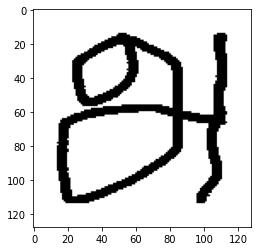

In [294]:
npArr=np.array(images)

# ridx = np.random.randint(images.shape[1])
# print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(npArr.reshape(w,h))

In [295]:
model = load_model('/home/snekha/datasets/tamil_data/tamilALLEzhuthukalKeras_Model.h5')


In [296]:
# def getTamilChar(tamilCharacterCode, indx):
#     return tamilCharacterCode[indx]
# npArr = images[0].reshape(1, 128, 128 , 1)
# atc = model.predict(npArr)
# percentage = atc[0]
# percentage
# valsss = atc[0].argsort()[-3:][::-1]
    
# responseTextSt = getTamilChar(tamilCharacterCode,valsss[0])+","+ getTamilChar(tamilCharacterCode,valsss[1])+ ","+ getTamilChar(tamilCharacterCode,valsss[2])
    
# responseTextSt = responseTextSt + ',%.3f,%.3f,%.3f'%(percentage[valsss[0]] *100.0,percentage[valsss[1]] *100.0,percentage[valsss[2]]*100.0)
# responseTextSt


In [297]:
def getTamilChar(tamilCharacterCode, indx):
    return tamilCharacterCode[indx]


In [298]:
npArr=images[0]
# npArr = np.asarray(images, dtype=np.uint8)
npArr = npArr.reshape(1, 128, 128 , 1)
# npArr=images
atc = model.predict(npArr)
    
percentage = atc[0]
valsss = atc[0].argsort()[-3:][::-1]
responseTextSt = getTamilChar(tamilCharacterCode,valsss[0])+","+ getTamilChar(tamilCharacterCode,valsss[1])+ ","+ getTamilChar(tamilCharacterCode,valsss[2])
responseTextSt = responseTextSt + ',%.3f,%.3f,%.3f'%(percentage[valsss[0]] *100.0,percentage[valsss[1]] *100.0,percentage[valsss[2]]*100.0)
responseTextSt

1/1 [==============================] - 0s 59ms/step


'அ,து,னு,79.820,19.068,0.508'

In [299]:
a=getTamilChar(tamilCharacterCode,valsss[0])
file1 = open("tamil_pdf.txt", "a")  # append mode
file1.write(a)
file1.close()

In [205]:
# # Load image, grayscale, Otsu's threshold
# image = cv2.imread('t.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# # Find contours, sort from left-to-right, then crop
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts, _ = contours.sort_contours(cnts, method="left-to-right")

# ROI_number = 0
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > 1:
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = 255 - image[y:y+h, x:x+w]
#         cv2.imwrite('/home/snekha/hackathons/taml/ml/code/image/ROI_{}.png'.format(ROI_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#         ROI_number += 1

In [89]:
# import cv2
# from imutils import contours

# # Load image, grayscale, Otsu's threshold
# image = cv2.imread('.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# # Find contours, sort from left-to-right, then crop
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts, _ = contours.sort_contours(cnts, method="left-to-right")

# ROI_number = 0
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > 10:
#         x,y,w,h = cv2.boundingRect(c)
#         ROI = 255 - image[y:y+h, x:x+w]
#         cv2.imwrite('/home/snekha/hackathons/taml/ml/code/image/ROI_{}.png'.format(ROI_number), ROI)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#         ROI_number += 1

In [90]:
# global tamilCharacterCode, model
# att=bytes(images)
# print(type(att))
# # imgStr = att.decode('utf-8')
# # imgArr = att.split(',')
# npArr = np.asarray(images, dtype=np.uint8).reshape(400,400)
    
        
# npArr = RR(npArr)
# npArr = npArr.reshape(1, 128, 128 , 1)

In [205]:
# import os
# from math import floor
# import io
# import requests
# from PIL import Image
# from flask_wtf import FlaskForm
# from flask import request
# from flask import Flask
# from wtforms import StringField, PasswordField, SubmitField, BooleanField, TextAreaField
# from wtforms.validators import DataRequired, Length, Email,EqualTo, ValidationError
# from flask import render_template, url_for, flash, redirect, request, abort
# import numpy as np
# import cv2
# import csv
# from matplotlib import pyplot as plt
# from tensorflow.keras.models import load_model
# import pickle



# tamilCharacterCode = []
# model = None


# def bbox2(img1):
#   img = 1 - img1
#   rows = np.any(img, axis=1)
#   cols = np.any(img, axis=0)
#   rmin, rmax = np.where(rows)[0][[0, -1]]
#   cmin, cmax = np.where(cols)[0][[0, -1]]
#   return rmin, rmax, cmin, cmax
# def RR(img):
#     rmin, rmax, cmin, cmax = bbox2(img)
#     # print(rmin, rmax, cmin, cmax)
#     npArr = img[rmin:rmax, cmin:cmax]
#     npArr = cv2.resize(npArr, dsize=(100, 100))
#     jinga = np.ones((128,128))
#     jinga[14:114,14:114] = npArr
#     npArr = jinga.reshape(128, 128 , 1)
#     return npArr

# def getTamilChar(tamilCharacterCode, indx):
#     return tamilCharacterCode[indx]

    

# def get_post_javascript_data():
#     global tamilCharacterCode, model
#     att = images
#     print(type(att))
#     imgStr = att.decode('utf-8')
#     imgArr = imgStr.split(',')
#     npArr = np.asarray(imgArr, dtype=np.uint8).reshape(400,400)
    
        
#     npArr = RR(npArr)
#     npArr = npArr.reshape(1, 128, 128 , 1)
#     atc = model.predict(npArr)
    
#     percentage = atc[0]

#     valsss = atc[0].argsort()[-3:][::-1]
    
#     responseTextSt = getTamilChar(tamilCharacterCode,valsss[0])+","+ getTamilChar(tamilCharacterCode,valsss[1])+ ","+ getTamilChar(tamilCharacterCode,valsss[2])
    
#     responseTextSt = responseTextSt + ',%.3f,%.3f,%.3f'%(percentage[valsss[0]] *100.0,percentage[valsss[1]] *100.0,percentage[valsss[2]]*100.0)
    
#     return responseTextSt


# def init_somethings():

#     global tamilCharacterCode, model

#     with open('/home/snekha/datasets/tamil_data/unicodeTamil.csv', newline='') as f:
#         reader = csv.reader(f)
#         data = list(reader)
#         for i in data:
#             go = i[1].split(' ')
#             charL = ""
#             for gg in go:
#                 charL = charL + "\\u"+str(gg)
#             tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
    
    
#     model = load_model('/home/snekha/datasets/tamil_data/tamilALLEzhuthukalKeras_Model.h5')
#     print(model.summary())


In [170]:
# get_post_javascript_data()

In [171]:
# def imageDataToGrayscale(imgData):
            
#                 grayscaleImg = []
#                 y=x=0
#                 while(y < imgData.height):
            
#                     grayscaleImg[y]=[]
#                     y=y+1
#                     while(x < imgData.width):
                    
#                         offset = y * 4 * imgData.width + 4 * x
#                         alpha = imgData.data[offset+3]
#                         # weird: when painting with stroke, alpha == 0 means white;
#                         # alpha > 0 is a grayscale value; in that case I simply take the R value
#                         if alpha == 0:
                        
#                             imgData.data[offset] = 255
#                             imgData.data[offset+1] = 255
#                             imgData.data[offset+2] = 255
                        
#                         imgData.data[offset+3] = 255
#                         # simply take red channel value. Not correct, but works for
#                         # black or white images.
#                         grayscaleImg[y][x] = imgData.data[y*4*imgData.width + x*4 + 0] / 255
#                         x=x+1
                
#                 return grayscaleImg
            


In [172]:
# imageDataToGrayscale()

In [173]:
# def bbox2(img1):
#   img = 1 - img1
#   rows = np.any(img, axis=1)
#   cols = np.any(img, axis=0)
#   rmin, rmax = np.where(rows)[0][[0, -1]]
#   cmin, cmax = np.where(cols)[0][[0, -1]]
#   return rmin, rmax, cmin, cmax
# def RR(img):
#     rmin, rmax, cmin, cmax = bbox2(img)
#     # print(rmin, rmax, cmin, cmax)
#     npArr = img[rmin:rmax, cmin:cmax]
#     npArr = cv2.resize(npArr, dsize=(100, 100))
#     jinga = np.ones((128,128))
#     jinga[14:114,14:114] = npArr
#     npArr = jinga.reshape(128, 128 , 1)
#     return npArr

In [174]:

# # npArr = np.asarray(npArr, dtype=np.uint8).reshape(400,400)
    
        
# npArr = RR(npArr)
# npArr = npArr.reshape(1, 128, 128 , 1)
# atc = model.predict(npArr)
    
# percentage = atc[0]

# valsss = atc[0].argsort()[-3:][::-1]
    
# responseTextSt = getTamilChar(tamilCharacterCode,valsss[0])+","+ getTamilChar(tamilCharacterCode,valsss[1])+ ","+ getTamilChar(tamilCharacterCode,valsss[2])
    
# responseTextSt = responseTextSt + ',%.3f,%.3f,%.3f'%(percentage[valsss[0]] *100.0,percentage[valsss[1]] *100.0,percentage[valsss[2]]*100.0)
    
# return responseTextSt